# Lecture 07

In [1]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Binary Hypothesis Testing

* The *null hypothesis* is that there is no real difference between the two data sets, and any differences are just based on random sampling from the underlying population.

So, let's **assume that the two samples are from the same population**. 

* By combining the samples (called **pooling**), we get a new subset of the original population, if the null hypothesis is true. Moreover, any sample from this better represents the original population than either of the samples.

* We can check whether the null hypothesis is true by checking how often samples from the pooled data set have a difference in means as large as the one observed.

<div class="alert alert-info">
    <b>Pooling</b>
    
**Pooling** describes the practice of gathering together small sets of data that are assumed to have been *drawn* from the same underlying population and using the combined larger set (the *pool*) to obtain a more precise estimate of that population.
</div>

## Sampling

**The big question:** to sample **with replacement** or **without replacement**?

<div class="alert alert-info">
    <b>Bootstrapping</b>
    
**Sampling with replacement** from a pooling set is called **bootstrapping** and is the most popular resampling technique. It is meant to better emulate independent sampling from the original population.
</div>

<div class="alert alert-info">
    <b>Permutations</b>
    
**Sampling without replacement** from a pooling set better emulates **permutation** tests, where we check every possible reordering of the data into samples. This will be discussed more later.
</div>

* Generally, *sampling without replacement* is more conservative (produces a higher $p$-value) than bootstrapping. 
* Bootstraping is **easy** and **most popular**, and we apply it here.

**The Bootstrap Idea:** The original sample approximates the population from which it was drawn. So *resamples* from this sample approximate what we would get if we took many samples from the population. The bootstrap distribution of a statistic, based on many resamples, approximates the sampling distribution of the statistic, based on many samples.

In [2]:
df = pd.read_csv('firearms-combined.csv')

df

,STATE,RATE-2005,RATE-2014,Total Laws 2014
0,AL,16.0,16.9,10
1,AK,17.5,19.2,3
2,AZ,16.1,13.5,8
3,AR,15.7,16.6,11
4,CA,9.5,7.4,100
5,CO,11.6,12.2,30
6,CT,5.3,5.0,85
7,DE,8.8,11.1,38
8,FL,10.0,11.5,21
9,GA,12.1,13.7,6


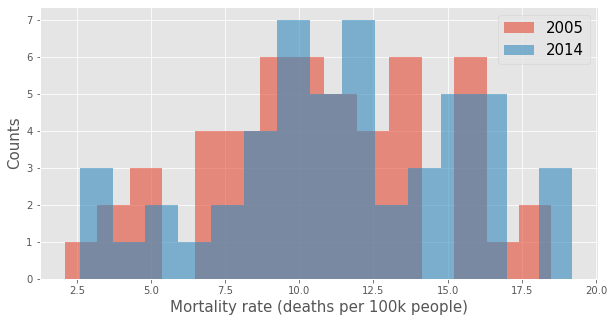

In [3]:
rate2005 = df['RATE-2005'].to_numpy()
rate2014 = df['RATE-2014'].to_numpy()

plt.figure(figsize=(10,5))
plt.hist(rate2005,alpha=0.6,bins=15,label='2005')
plt.hist(rate2014,alpha=0.6,bins=15,label='2014');
plt.legend(fontsize=15)
plt.xlabel('Mortality rate (deaths per 100k people)', size=15)
plt.ylabel('Counts', size=15);

In [4]:
# Statistic - difference of the sample averages

diff = rate2014.mean()-rate2005.mean()
diff

0.6300000000000026

### Bootstrap Model 1

In [5]:
pooled = np.concatenate((rate2005, rate2014))
pooled

array([16. , 17.5, 16.1, 15.7,  9.5, 11.6,  5.3,  8.8, 10. , 12.1,  2.1,
       14.1,  8. , 11.2,  6.7,  9.3, 13. , 18.5,  7.8, 11.9,  3.4, 10.8,
        7. , 16. , 12.9, 16.9,  7.7, 16.1,  6.6,  5.2, 13.9,  5.3, 12.8,
        8.8,  9.6, 13.2, 10.7, 10.8,  3.6, 13.8, 10.2, 16. , 11.1, 10.1,
        6.8, 11.5,  8.8, 13.8,  8.5, 13.4, 16.9, 19.2, 13.5, 16.6,  7.4,
       12.2,  5. , 11.1, 11.5, 13.7,  2.6, 13.2,  9. , 12.4,  7.5, 11.3,
       13.9, 19. ,  9.4,  9. ,  3.2, 11.1,  6.6, 18.3, 15.3, 16.1,  9.5,
       14.8,  8.7,  5.3, 16. ,  4.2, 11.8, 12.3, 10.3, 15.7, 11.7, 10.5,
        3. , 15.5, 10.3, 15.1, 10.7, 12.3, 10.3, 10.3,  9.7, 14.6,  8.2,
       16.2])

In [6]:
print(pooled.size, len(pooled), pooled.shape)

100 100 (100,)


* How would we randomly choose from this data **with replacement**?

* And, if each resample is a new sample, which size should the resample have?

In [7]:
# resample for, for example, rate-2005
print(random.choices(pooled, k=50))

[15.7, 15.3, 6.6, 15.7, 18.5, 6.6, 16.9, 10.3, 16.0, 13.7, 3.0, 18.5, 13.8, 10.5, 11.8, 12.2, 15.1, 15.7, 18.5, 5.0, 16.2, 11.2, 10.8, 9.0, 11.6, 18.5, 11.7, 5.3, 8.2, 10.3, 17.5, 13.0, 13.9, 17.5, 13.9, 5.3, 11.1, 10.7, 18.5, 5.3, 7.4, 8.7, 10.2, 6.6, 16.0, 16.0, 8.5, 16.2, 16.0, 6.6]


Recall that ```numpy.random``` has a similar method:

In [8]:
npr.choice(pooled, size=50)

array([19.2, 10.1, 16.1, 18.5, 14.6, 12.8, 16.1,  2.1,  5.3, 16. , 14.1,
        6.7,  7.4,  9. , 13.8,  8. ,  9.3,  9. , 13.8, 19. , 12.2, 10.3,
        3. , 10. , 16.1,  4.2, 11.5,  5. , 10.7, 13.4, 12.2, 13. , 10.3,
       11.6,  5.3, 19.2,  8.5,  9.6, 11.1,  3. , 15.7, 18.3,  8.7,  2.6,
       16. , 10.3, 11.9,  8.2, 11.5,  5.2])

For a significance level of $\alpha = 0.05$, let's build a Bootstrap simulation to compute the probability of observing a mean difference of 0.63 or larger:

In [9]:
num_sims=10_000
event_count=0

for sim in range(num_sims):
    resample05 = npr.choice(pooled, size=50) # Bootstrap, sampling from pooling with replacement
    resample14 = npr.choice(pooled, size=50) 
    
    # Computes resample averages
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    # statistic - difference of the sample averages
    resample_diff = mean14 - mean05
    
    # Compare the resampled statistic with the observed statistic value (diff)
    # We want to count extreme events, i.e., observing a resampled 
    #statistic larger or equal then the original one
    if abs(resample_diff) >= diff: # 2-sided hypothesis test 
        event_count+=1
    
    
print("Under null hypothesis, observe effect this large with prob. ", event_count/num_sims)
print('p-value = ',event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.435
p-value =  0.435


* **What is the conclusion?**

    * **Is the result statistically significant?** No, because the p-value is larger than $\alpha=0.05$.
    * **Can we reject the null hypothesis?** No, "we cannot reject the null hypothesis".
    * **Conclusion:** The data suggests that the ban did not have an effect of firearm mortality rate.

### Bootstrap Model 2

A more reasonable bootstrap approach would be to randomly assign values from 2005 or 2014 **for each state** and then assess the difference:

In [10]:
stacked_data = np.vstack((rate2005, rate2014)).T

stacked_data.shape

(50, 2)

In [11]:
# Alternative: Use the Pandas library

stacked_data = df[['RATE-2005', 'RATE-2014']].to_numpy()

stacked_data.shape

(50, 2)

In [12]:
stacked_data

array([[16. , 16.9],
       [17.5, 19.2],
       [16.1, 13.5],
       [15.7, 16.6],
       [ 9.5,  7.4],
       [11.6, 12.2],
       [ 5.3,  5. ],
       [ 8.8, 11.1],
       [10. , 11.5],
       [12.1, 13.7],
       [ 2.1,  2.6],
       [14.1, 13.2],
       [ 8. ,  9. ],
       [11.2, 12.4],
       [ 6.7,  7.5],
       [ 9.3, 11.3],
       [13. , 13.9],
       [18.5, 19. ],
       [ 7.8,  9.4],
       [11.9,  9. ],
       [ 3.4,  3.2],
       [10.8, 11.1],
       [ 7. ,  6.6],
       [16. , 18.3],
       [12.9, 15.3],
       [16.9, 16.1],
       [ 7.7,  9.5],
       [16.1, 14.8],
       [ 6.6,  8.7],
       [ 5.2,  5.3],
       [13.9, 16. ],
       [ 5.3,  4.2],
       [12.8, 11.8],
       [ 8.8, 12.3],
       [ 9.6, 10.3],
       [13.2, 15.7],
       [10.7, 11.7],
       [10.8, 10.5],
       [ 3.6,  3. ],
       [13.8, 15.5],
       [10.2, 10.3],
       [16. , 15.1],
       [11.1, 10.7],
       [10.1, 12.3],
       [ 6.8, 10.3],
       [11.5, 10.3],
       [ 8.8,  9.7],
       [13.8,

Now, we want to a special kind of array indexing: **fancy indexing**.

In [13]:
a = npr.randint(2, size=50)
a

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1])

In [14]:
stacked_data[range(50),a] # 2-D Fancy indexing

array([16.9, 17.5, 13.5, 15.7,  9.5, 12.2,  5. ,  8.8, 10. , 12.1,  2.1,
       13.2,  8. , 11.2,  7.5,  9.3, 13. , 18.5,  7.8,  9. ,  3.2, 11.1,
        7. , 18.3, 15.3, 16.9,  9.5, 16.1,  8.7,  5.3, 16. ,  5.3, 12.8,
       12.3,  9.6, 13.2, 10.7, 10.8,  3.6, 15.5, 10.3, 16. , 10.7, 12.3,
        6.8, 11.5,  8.8, 13.8,  8.2, 16.2])

For a significance level of $\alpha = 0.05$, let's build a Bootstrap simulation to compute the probability of observing a mean difference of 0.63 or larger:

In [15]:
num_sims=10_000
event_count=0

for sim in range(num_sims):
    resample05 = stacked_data[range(50), npr.randint(2, size=50)] # 2-D Fancy indexing
    resample14 = stacked_data[range(50), npr.randint(2, size=50)]
    
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    sample_diff = mean14-mean05
    
    if abs(sample_diff)>= diff: # 
        event_count+=1
    

print("Under null hypothesis, observe effect this large with prob. ",event_count/num_sims)

Under null hypothesis, observe effect this large with prob.  0.0001


* **What is the conclusion?**

    * **Is the result statistically significant?** Yes, because the p-value is smaller than $\alpha=0.05$.
    * **Can we reject the null hypothesis?** Yes, we reject the null hypothesis.
    * **Conclusion:** Under this interpretation, the restriction on assault weapons is associated with an increase in mean firearms morality.

It depends on how you interpret the data!

### Distribution of the bootstrap mean-difference

Every time we create a bootstrap value for the difference of means, we create a new random value. Let's see how the bootstrap means are distributed by looking at a histogram of those values:

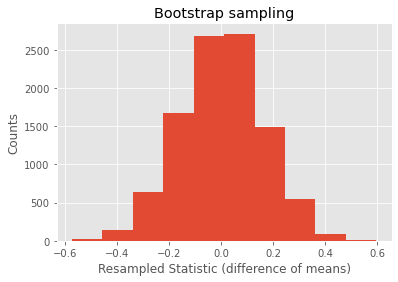

In [16]:
num_sims=10_000
bs_stats=[]

for sim in range(num_sims):
    resample05 = stacked_data[range(50), npr.randint(2, size=50)] # 2-D Fancy indexing
    resample14 = stacked_data[range(50), npr.randint(2, size=50)]
    
    mean05 = resample05.mean()
    mean14 = resample14.mean()
    
    sample_diff = mean14-mean05
    bs_stats += [sample_diff]

    
plt.hist(bs_stats)
plt.xlabel('Resampled Statistic (difference of means)')
plt.ylabel('Counts')
plt.title('Bootstrap sampling');

A few obervations:
    
1. The difference of means has a bell shape -- we saw that before. Why do you think that is?
2. Almost all of the values fall between -0.5 and +0.5. Thus, it is not surprising that getting a mean-difference as large as 0.6 is very rare.

**Topic for later:** The **Central Limit Theorem** (CLT) for sums says that if you keep drawing larger and larger samples and taking their sums, the sums form their own normal distribution (the sampling distribution), which approaches a normal distribution as the sample size increases. 

___

We can now consider the question: **what values of the mean-difference will make it such that we have 95\% confidence that we should ACCEPT the null hypothesis?**

In [17]:
bs_stats.sort() # sorts (in ascendent order) in place
# bs_stats

In [18]:
np.sum(np.array(bs_stats)<-0.5)

8

In [19]:
len(bs_stats)

10000

So, the percentage of data lying below -0.5 is:

In [20]:
np.sum(np.array(bs_stats)<-0.5)/len(bs_stats)*100

0.08

Similarly, the percentage lying above 0.5 is:

In [21]:
np.sum(np.array(bs_stats)>0.5)/len(bs_stats)*100

0.08

In [22]:
100 - 0.14 - 0.05

99.81

Another way to express this is that 99.80% of the data is between $[-0.5, 0.5]$.

This is an example of a **confidence interval**. 

* Confidence intervals offer an alternative to $p$-values that provide more information. 

* When we say a $x$% confidence interval, we usually mean the region such that $(100-x)/2$% of samples will fall below the confidence interval, and $(100-x)/2$% of samples will fall above the confidence interval. 

The confidence interval for a bootstrap statistic cannot be known exactly, but it can be estimated accurately given enough samples of the bootstrap statistic.

# Confidence Intervals

**Procedure for Estimating Confidence Interval for a Bootstrap Statistic**

1. Draw $N$ samples from the pooled data using replacement
2. For each sample(s), compute the desired statistic and store it
3. Sort all of the stored statistics
4. For confidence interval $x$%:
    * the lower bound of the confidence interval is the element in position $N(1-x)/2$
    * the upper bound of the confidence interval is the element in position $N-N(1-x)/2= N \cdot x/2$

**<font color=blue>Example 1:</font> Compute the 95% confidence interval for the example above.**

In [23]:
bs_stats.sort()
# bs_stats

Find the **position** in the sorted sequence of the lower bound of the confidence interval:

In [24]:
lower = len(bs_stats)*(1-0.95)/2
lower

250.00000000000023

Now find the **value** of the sorted data at that position. That is the lower end of our confidence region:

In [25]:
bs_stats[int(lower)]

-0.31200000000000117

Finding the position of the upper bound of the confidence interval is most easily done using the position of the lower bound:

In [26]:
upper = len(bs_stats) -lower -1
upper

9749.0

In [27]:
bs_stats[int(upper)]

0.3119999999999994

Thus, the 95% confidence interval is $[-0.31, 0.31]$.

**How can confidence intervals be used in place of $p$-values?** 
* Instead of conducting a binary hypothesis test with $\alpha=0.05$, we can compute the 95% confidence interval for the mean difference. Then we observe if the result lies within the 95% confidence interval.

The observed mean-difference value was 0.63. This falls outside the 95% confidence interval $[-0.31,0.31]$. The fact that the observed value is far outside the 95% confidence interval makes it likely that we could have used a stronger criteria (like 99% confidence intervals).

___

___

# Exact Permutation Tests

<div class="alert alert-info">
    <b>Permutations</b>
    
**Sampling without replacement** from a pooling set better emulates **permutation** tests, where we check every possible reordering of the data into samples.
</div>

## Monte Carlo Permutation Test

**<font color=blue>Example 2:</font> Let's consider the following question that should be of interest to engineers: *Do males score higher on standardized high school math and science tests than females?***

* We will use data from the ["High School & Beyond (HS&B)" survey](https://nces.ed.gov/surveys/hsb/index.asp) conducted by the National Center for Education Statistics.

* We are using a CSV file with 200 **randomly selected** observations from that data set. The CSV file is available [here](https://github.com/rpruim/OpenIntro/blob/master/data/hsb2.csv).

* A brief discussion of the different fields is available [here](http://www.philender.com/courses/762/notes1/about_hsb2.html).

In [28]:
df = pd.read_csv('hsb2.csv')
df

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61
...,...,...,...,...,...,...,...,...,...,...,...
195,31,female,asian,middle,private,general,55,59,52,42,56
196,145,female,white,middle,public,vocational,42,46,38,36,46
197,187,female,white,middle,private,general,57,41,57,55,52
198,118,female,white,middle,public,general,55,62,58,58,61


In [29]:
df.head(10)

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61
5,113,male,white,middle,public,academic,44,52,51,63,61
6,50,male,african american,middle,public,general,50,59,42,53,61
7,11,male,hispanic,middle,public,academic,34,46,45,39,36
8,84,male,white,middle,public,general,63,57,54,58,51
9,48,male,african american,middle,public,academic,57,55,52,50,51


In [30]:
df.columns

Index(['id', 'gender', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

* We want to partition this dataframes into two separate dataframes according to gender.

This is easy to do in pandas, but it looks a little strange. First we get a boolean Series the contains True for whichever rows we want to keep:

In [31]:
df['gender']=='female'

0      False
1       True
2      False
3      False
4      False
       ...  
195     True
196     True
197     True
198     True
199     True
Name: gender, Length: 200, dtype: bool

In [32]:
females = df[df['gender']=='female']
females

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
1,121,female,white,middle,public,vocational,68,59,53,63,61
92,82,female,white,high,public,academic,68,62,65,69,61
93,8,female,hispanic,low,public,academic,39,44,52,44,48
94,129,female,white,low,public,general,44,44,46,47,51
95,173,female,white,low,public,general,50,62,61,63,51
...,...,...,...,...,...,...,...,...,...,...,...
195,31,female,asian,middle,private,general,55,59,52,42,56
196,145,female,white,middle,public,vocational,42,46,38,36,46
197,187,female,white,middle,private,general,57,41,57,55,52
198,118,female,white,middle,public,general,55,62,58,58,61


In [33]:
males = df[df['gender']=='male']
males

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61
5,113,male,white,middle,public,academic,44,52,51,63,61
...,...,...,...,...,...,...,...,...,...,...,...
87,117,male,white,high,public,vocational,34,49,39,42,56
88,133,male,white,middle,public,vocational,50,31,40,34,31
89,94,male,white,high,public,academic,55,49,61,61,56
90,24,male,asian,middle,public,academic,52,62,66,47,46


Now, if we pass that Series as indices to the original dataframe, it will return a new dataframe with only those rows:

Let's start with math scores:

In [34]:
males['math']

0     41
2     54
3     47
4     57
5     51
      ..
87    39
88    40
89    61
90    66
91    49
Name: math, Length: 91, dtype: int64

In [35]:
males['math'].to_numpy()

array([41, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43, 51, 60,
       62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64, 63, 57, 50,
       58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70, 63, 59, 61, 38,
       61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41, 50, 40, 60, 47, 59,
       49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54, 57, 54, 71, 48, 40, 64,
       51, 39, 40, 61, 66, 49])

* What can you infer from this plot?

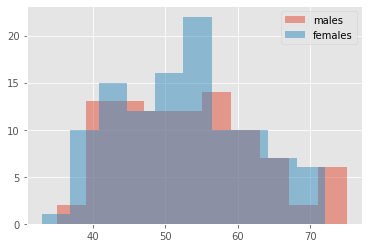

In [36]:
plt.hist(males['math'], alpha=0.5, label='males')
plt.hist(females['math'], alpha=0.5, label='females')
plt.legend();

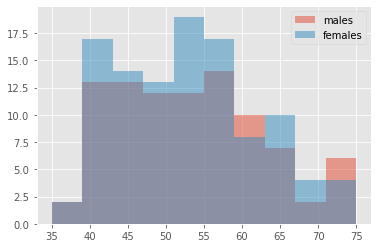

In [37]:
counts, mybins, _ = plt.hist(males['math'], alpha=0.5, label='males')
plt.hist(females['math'], bins=mybins, alpha=0.5, label='females')
plt.legend();

There is very little difference for mean math scores between gender -- I'm not even going to conduct a statistical test on those values.

Let's consider science scores:

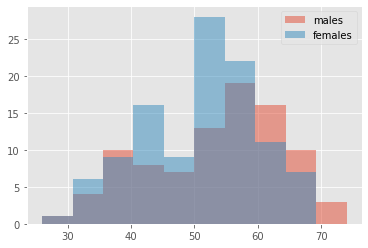

In [38]:
counts, mybins, _ = plt.hist(males['science'], alpha=0.5, label='males')
plt.hist(females['science'], bins=mybins, alpha=0.5, label='females')
plt.legend();

In [39]:
# statistic (difference of means)

diff = males['science'].mean() - females['science'].mean()
diff

2.533521524347215

If you had to perform an exact permutation test, i.e., try *all* the ways to resample the data into samples of size 91 and 109, how many different sample combinations are there?

In [48]:
from scipy.special import binom
binom(200,109)

4.040047748665152e+58

Instead, let's sample 10,000 of the permutations. Since there are so many, we will randomly select permutations, so there is some small probability of repeat.

To choose the samples, we will permute the pooled data and then subdivide into the appropriate sizes:

In [49]:
pooled = df['science'].to_numpy()

pooled.shape

(200,)

In [51]:
num_sims=10_000
event_count=0

for sim in range(num_sims):
    perm = npr.permutation(pooled) # This will shuffle the points in the pooling set
    
#     male_sample = perm[0:len(males)] # extracts the first 91 samples
    # Alternative 
    male_sample = perm[:len(males)]
    
#     female_sample = perm[len(males):(len(males)+len(females))] # extracts the last 109 samples
    # Alternative
    female_sample = perm[len(males):]
    
    # Resample Statistic
    sample_diff = male_sample.mean() - female_sample.mean()
    
    # 2-sided hypothesis test
    if abs(sample_diff) >= diff:
        event_count+=1

print('Prob of seeing average difference of ',diff,' under H0 is ~', event_count/num_sims)

Prob of seeing average difference of  2.533521524347215  under H0 is ~ 0.0744


* **What are the set of hypothesis that we are working with?**

    * $H_0$: gender does not affect standardized science tests
    * $H_1$: gender affects standardized science tests

* **What is the conclusion?**
    * For a significance level of $\alpha=0.01$ (or $\alpha=0.05$), the result is not statistically significant.
    * We cannot reject the null hypothesis. 
    * In other words, there is no evidence that males score higher than females on standardized science tests.

___

# Gearing towards Bayesian reasoning...

* From the example above, what if we had *known* that any one of the genders' scores reported in the HS&B survey were from a subset of elite students? 

* Could we use this *prior information* in the computation of the p-value?

## Finding *A Posteriori* Probability

Suppose you flip a (unknown) coin 8 times and it comes up heads every time. If this were a fair coin, the probability of this occurring is:

In [52]:
0.5**8

0.00390625

**Without checking the coin, should you believe that the coin is two-headed?**

Let $F$ be the event that the coin is fair, and $E$ be the event that the coin comes up heads 8 times out of 8.

1. What is the probability that we are asked to find? $P(F|E)$

2. What type of probability is this? Posterior probability

3. Do we know this probability? What do we know? We do not know the posterior probability, but we know the likelihood $P(E|F)$

4. How can we determine $P(F|E)$? 1. Bayes rule analysis,  2. Using simulations

In order to estimated the *a posteriori* probability, we need the *a priori* or *prior* probability, but there is no way for us to know the true *prior*. So what to do?

We will have to choose the *prior*. How? There are 2 typical approaches:

1. <font color=blue>**Uninformative prior**</font>: We choose a prior that basically assumes as little information about the inputs as possible. For discrete inputs, this will often be equally likely probabilities

2. <font color=blue>**Informative prior**</font>: We choose a prior based on other knowledge of the problem

<font color=blue> **Go through the following at home!** </font>

## Uninformative Prior

Let's assume that the probabilities that coin is fair or two-tailed are equally likely:

In [ ]:
num_sims = 100_000
flips = 8
event_count = 0
fair_count = 0

cointypes = ['fair','2-headed']

for sim in range(num_sims):
    cointype = random.choice(cointypes)
    if cointype == 'fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads ==flips:
        event_count+=1
        if cointype=='fair':
            fair_count+=1


            
print('Prob. of fair coin given that',flips,'heads in 8 flips observed is', fair_count/event_count)

It is very unlikely that the coin was fair, under this uninformative prior.

Let's modify the code above to store the type of coin used for each simulation and create some graphical EDA.

In [ ]:
num_sims = 100_000
flips = 8
selected_coin=[]

# Each coin is equally likely -- uninformative prior.
cointypes = ['fair','2-headed']

for sim in range(num_sims):
    cointype = random.choice(cointypes)
    if cointype=='fair':
        S = ['H','T']
    else:
        S=['H','H']
    coins = random.choices(S, k=flips)
    num_heads = coins.count('H')
    if num_heads == flips:
        selected_coin+=[cointype]

In [ ]:
selected_coin.count('fair')/len(selected_coin)

In [ ]:
selected_coin.count('2-headed')/len(selected_coin)

In [ ]:
rel_freq = [selected_coin.count('fair')/len(selected_coin),
            selected_coin.count('2-headed')/len(selected_coin)]

In [ ]:
plt.bar(cointypes, rel_freq);

In [ ]:
plt.bar(cointypes, rel_freq)
plt.yscale('log');

## Informative Prior

What if you believe that **before** you observed the outcome, you thought the **probability that the coin was fair was at least 99/100**?

In [ ]:
num_sims = 100_000
flips = 8
selected_coin=[]

# Each coin will have its own probability
# P(fair) = 99/100 and P(2-headed)=1/100
cointypes = ['fair']*99 + ['2-headed']

for sim in range(num_sims):
    cointype = random.choice(cointypes)
    if cointype=='fair':
        S = ['H','T']
    else:
        S=['H','H']
    coins = random.choices(S, k=flips)
    num_heads = coins.count('H')
    if num_heads == flips:
        selected_coin+=[cointype]

In [ ]:
rel_freq = [selected_coin.count('fair')/len(selected_coin),
            selected_coin.count('2-headed')/len(selected_coin)]

cointypes = ['fair','2-headed']

plt.bar(cointypes, rel_freq);

What if you believe that before you observed the outcome, you thought the **probability that the coin was fair was at least 999/1000**?

In [ ]:
num_sims = 100_000
flips = 8
selected_coin=[]

# Each coin will have its own probability
# P(fair) = 999/1000 and P(2-headed)=1/1000
cointypes = ['fair']*999 + ['2-headed']

for sim in range(num_sims):
    cointype = random.choice(cointypes)
    if cointype=='fair':
        S = ['H','T']
    else:
        S=['H','H']
    coins = random.choices(S, k=flips)
    num_heads = coins.count('H')
    if num_heads == flips:
        selected_coin+=[cointype]

rel_freq = [selected_coin.count('fair')/len(selected_coin),
            selected_coin.count('2-headed')/len(selected_coin)]
plt.bar(['fair','2-headed'],rel_freq)
plt.ylabel('P(coin|8 heads in 8 flips)\n Posterior Probability')
plt.xlabel('type of coin');

### Discussion

* The evidence that the coin is not fair is pretty strong because the probability of getting 8 heads on 8 flips is very small (1/2)^8. 

* However, under this prior belief, the probability of having a two-headed coin is also very, very small.

### What prior makes it equally likely for the coin to be fair or two-headed?

**How many fair coins do we need to have in the box (and how many 2-headed coins) that will make it such that if we draw one coin at random, observing $N$ heads in $N$ flips of (the same) coin, is an equally likely event to occur with either a fair or a 2-headed coin?**

In [ ]:
num_sims = 100_000
flips = 8
selected_coin=[]

# Each coin will have its own probability
# P(fair) = 256/257 and P(2-headed)=1/257
cointypes = ['fair']*256 + ['2-headed']

for sim in range(num_sims):
    cointype = random.choice(cointypes)
    if cointype=='fair':
        S = ['H','T']
    else:
        S=['H','H']
    coins = random.choices(S, k=flips)
    num_heads = coins.count('H')
    if num_heads == flips:
        selected_coin+=[cointype]

rel_freq = [selected_coin.count('fair')/len(selected_coin),
            selected_coin.count('2-headed')/len(selected_coin)]
plt.bar(['fair','2-headed'],rel_freq)
plt.ylabel('P(coin|8 heads in 8 flips)\n Posterior Probability')
plt.xlabel('type of coin');

### How can we find this analytically?

**<font color=blue>Example 1:</font>** Suppose we have a box where we will place a certain amount of fair coins and a certain amount of 2-headed coins.

**How many fair coins do we need to have in the box (and how many 2-headed coins) that will make it such that if we draw one coin at random, observing $N$ heads in $N$ flips of (the same) coin, is an equally likely event to occur with either a fair or a 2-headed coin?**

<!-- * Let $F$ be the event that a fair coin was selected, $\overline{F}$ the event that a 2-headed coin was selected, and $E_i$ be the event that $i$ heads occur in $i$ flips of a coin.

We want to find $p = P(F)$ such that:

\begin{align*}
P(F|E_{8}) = P(\overline{F}|E_{8}) = \frac{1}{2}
\end{align*}

Check: $P(F|E_{8}) + P(\overline{F}|E_{8}) = 1$.

Applying the Bayes' rule:

\begin{align*}
P(F|E_8) &= \frac{1}{2}\\
\frac{P(E_8|F)P(F)}{P(E_8)} &= \frac{1}{2}\\
\frac{P(E_8|F)P(F)}{P(E_8|F)P(F) + P(E_8|\overline{F})P(\overline{F})} &= \frac{1}{2}\\
\frac{(1/2)^8 p}{(1/2)^8 p + (1)^8 (1-p)} &= \frac{1}{2}\\
p &= \frac{2^8}{2^8 + 1} = \frac{256}{257}
\end{align*}

For a streak of $N$ heads:
\begin{align*}
\frac{(1/2)^N p}{(1/2)^N p + (1)^N (1-p)} &= \frac{1}{2}\\
p &= \frac{2^N}{2^N + 1}
\end{align*}

Therefore, when $N=8$, $p = P(F) = \frac{2^8}{2^8 +1}$, that is, we need 255 fair coins and only 1 2-headed coin in the box such that when we select one coin at random and flip 8 times, it is equally for either a fair or a 2-headed coin to produce the outcome all heads. -->

___

<font color=blue> **We resumed in class here!** </font>

# Bayesian Binary Hypothesis Testing

## Extending the set of priors

Consider again the example of flipping a coin 8 times and observing 8 heads. We wish to generalize our experimental test to deal with other cases beyond just either fair or two-sided.

Coins can be biased to land on one side more than the other. We can extend our previous experiment to allow any probability of heads from 0 to 1. Let's take a sample every 0.01:

In [53]:
# probability of flipping Heads

np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

### Prep-Work: Randomly Sample From a Probabilistic Model

To simulate an event with arbitary probability $P_E$:

1. Generate a random number R that is equally likely to be between 0 and 1.

2. If $R \le P_E$, then in the simulation, the event occurs. Otherwise it does not occur.

We can generate the required random number using different libraries. 

In [54]:
?npr.random_sample

In [55]:
?npr.uniform

In [56]:
# Example simulation
Pe=0.13 #selected coin
num_sims=1_000_000

event_count=0
for sim in range(num_sims):
    if npr.uniform()<=Pe:
        event_count+=1

print('According to the simulation Pe ~=', event_count/num_sims)

According to the simulation Pe ~= 0.129892


In [83]:
# Faster simulation
Pe=0.13
num_sims=1_000_000

R = npr.uniform(size=num_sims)
event_count = np.sum(R<=Pe)

print('According to the simulation Pe ~=', event_count/num_sims)

According to the simulation Pe ~= 0.129947


Coming back to our coin example:

In [88]:
def exactcoins(flips=8, target=-1, num_sims=100_000):
    
    if target==-1:
        target = flips # if default value, we will count # Heads in flips = # flips.
        
    # Set of coins
    allcoins = np.linspace(0,1,101)
    
    events = []
    for sim in range(num_sims):
        prob_heads = npr.choice(allcoins) # selects the coin 
        R = npr.uniform(size=flips) # generate "flips" random values in the interval [0,1]
        num_heads = np.sum(R <= prob_heads) # count how many random values are less than the selected coin prob.
        if num_heads == target:
            events += [prob_heads]
#             print(events)
            
    vals, counts = np.unique(events, return_counts=True) # counts unique elements in "events"
    plt.bar(vals, counts/len(events), width=0.01) 
    plt.xlabel('Prior Probability, p', size=15)
    plt.ylabel('Posterior Probability for \n '+str(target)+' heads in '+str(flips)+' flips',size=15);
    
    return events

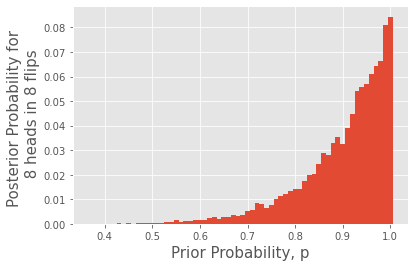

In [89]:
events = exactcoins();

The posterior is not 1 even when the prior is 1, because it is divided by the "evidence", or $P(B)$.

* How can we use this to conduct a statistical test? 

* The output is a full set of *a posterior* probabilities for all of the possible prior probability, $p$, values considered.

A typical approach is to check if a 95% or 99% confidence interval contains the fair coin ($p=0.5$).

Here are two basic approaches to finding the 95% confidence interval (without assuming anything about the distribution of the data):

## Confidence Interval Calculation Way 1

Sort the data and find the points that are 2.5% and 97.5% of the way through the sorted data.

In [62]:
def confidence_interval(data, C):
    '''Finds the C% confidence interval given data.
    C is a number between 0 and 100.'''
    
    alpha = 1-C/100 # if C=95%, alpha=0.05
    N = len(data) # number of samples in data
    
    # Formulas from above for the upper and lower bound CI values
    # correspond to the index locations in variable data
    lower_bound = int(N*alpha/2)
    upper_bound = N - lower_bound -1 
    
    print('bounds: ',lower_bound, upper_bound)
    
    sorted_data = np.sort(data) # sorts in ascendent order
    
    print(C,'% CI [',sorted_data[lower_bound],',',
         sorted_data[upper_bound],']')

In [63]:
confidence_interval?

In [64]:
confidence_interval(events, 95)

bounds:  288 11252
95 % CI [ 0.67 , 1.0 ]


In [65]:
confidence_interval(events, 99)

bounds:  57 11483
99 % CI [ 0.5700000000000001 , 1.0 ]


* **What is your conclusion?**

<!-- Under this set of prior probabilities, we would reject the possibility that a fair coin generated the outcome 8 heads in 8 flips, because $p=0.5$ does not lie in neither the 95% or 99% confidence intervals. -->

## Confidence Interval Calculation Way 2

* The thing that makes it hard to find the confidence intervals from the graph is that we are really asking about the sums of the probabilities of the tails of the plot.

* If we sum up the data as we move from left to right and plot the **running sums** (or **cumulative sum**), then we can see where we hit probabilities of 0.025 and 0.975.

* ```numpy``` has a cumulative sum function ```np.cumsum``` to do just this:

<font color=blue> **Go through the following at home!** 

In [66]:
vals, counts = np.unique(events, return_counts=True)

# Take the running sum or cumulative sum of these posterior probabilities
sum_counts = np.cumsum(counts/len(events))

In [67]:
# What point, do I have accumulated 2.5% probability

np.nonzero(sum_counts>=0.025)

(array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),)

In [68]:
np.nonzero(sum_counts>=0.025)[0]

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [69]:
np.nonzero(sum_counts>=0.025)[0][0]

27

In [70]:
vals[24]

0.64

In [71]:
def confidence_interval2(data, C):
    
    alpha = 1-C/100 # if C=95%, alpha=0.05
    N = len(data)
    
    vals, counts = np.unique(data, return_counts=True)
    
    sum_counts = np.cumsum(counts/N)
    
    lower_bound = np.nonzero(sum_counts>=alpha/2)[0][0]
    upper_bound = np.nonzero(sum_counts>=(1-alpha/2))[0][0]
    
    plt.bar(vals, sum_counts, width=0.01)
    plt.plot(vals, [alpha/2]*len(vals), 'r')
    plt.plot(vals, [1-alpha/2]*len(vals), 'g')
    plt.xlabel('Prior Probability, p',size=15)
    plt.ylabel('Cumulative/Runnin Sum', size=15)
    
    print(C,'% confidence interval : [',vals[lower_bound],',',
         vals[upper_bound],']')

95 % confidence interval : [ 0.67 , 1.0 ]


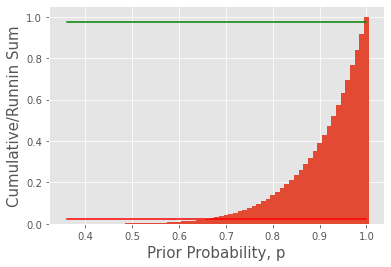

In [72]:
confidence_interval2(events, 95)

### What is the set of *a posteriori* probabilities look like if we observe 4 heads on 8 flips of a coin?

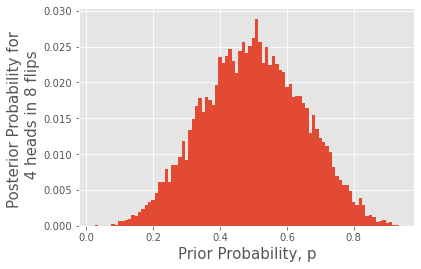

In [73]:
events2 = exactcoins(8,4)

In [74]:
confidence_interval(events2, 95)

bounds:  275 10736
95 % CI [ 0.21 , 0.79 ]


95 % confidence interval : [ 0.21 , 0.79 ]


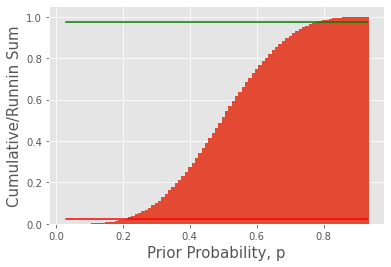

In [75]:
confidence_interval2(events2, 95)

In [76]:
confidence_interval(events2,99)

bounds:  55 10956
99 % CI [ 0.14 , 0.85 ]


99 % confidence interval : [ 0.14 , 0.85 ]


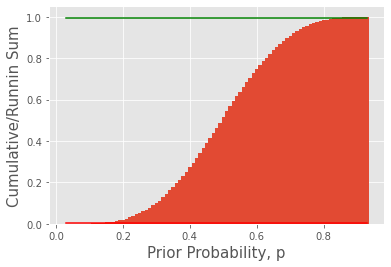

In [77]:
confidence_interval2(events2,99)

* What can you observed from this plot?

The cumulative histogram is smooth, while the regular histogram is not.

To explore this any further, we'll need to extend our tools for modeling random phenomena.

<font color=blue> **We resumed here in class!**

# Decision Rules

We have studied two forms of statistically inferencing: classifical (or frequentist) and Bayesian.

* **Frequentist statistician:**  draws conclusions from data by computing relative frequency of events in the data.

    * It computes the probability of future events using past observations only.
    * It computes the probability of *hypothesis*.

* **Bayesian statistician:** draws conclusions from data by testing out the hypothesis and computing their observed probability from data.

    * It computes the uncertainty of hypothesis by inducing prior beliefs.
    * It tests hypothesis.

This gives rise to two general **decision rules** forms.

<div class="alert alert-info" role="alert">
  <strong>Maximum Likelihood Estimation (MLE) Decision Rule</strong>

If the set of events $\{A_0, A_1\}$ partitions $\Omega$, and assuming $P(A_i)>0$, for all $i$. Then the Maximum Likelihood decision rule is given by:
    
\begin{align*}
P(B|A_0) \underset{A_1}{\overset{A_0}{\gtrless}} P(B|A_1)
\end{align*}

</div>

<div class="alert alert-info" role="alert">
  <strong>Maximum A Posteriori (MAP) Decision Rule</strong>

If the set of events $\{A_0, A_1\}$ partitions $\Omega$, and assuming $P(A_i)>0$, for all $i$. Then the Maximum A Posteriori decision rule is given by:
    
\begin{align*}
P(A_0|B) &\underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B) \\
\iff \frac{P(B|A_0)P(A_0)}{P(B)} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B|A_1)P(A_1)}{P(B)}
\end{align*}
    
</div>

**<font color=blue>Example:</font> Binary Communication System**

* **A transmitter Tx sends $A_0$ and $A_1$.**
* **A receiver Rx processes the output of the channel into one of two values $B_0$ and $B_1$.**
* **The channel is a noisy channel that determines the probabilities between $A_0$, $A_1$ and $B_0$, $B_1$.**

**The transitions are conditional probabilities $P(B_j|A_i)$ that can be specified on a channel transition diagram:**

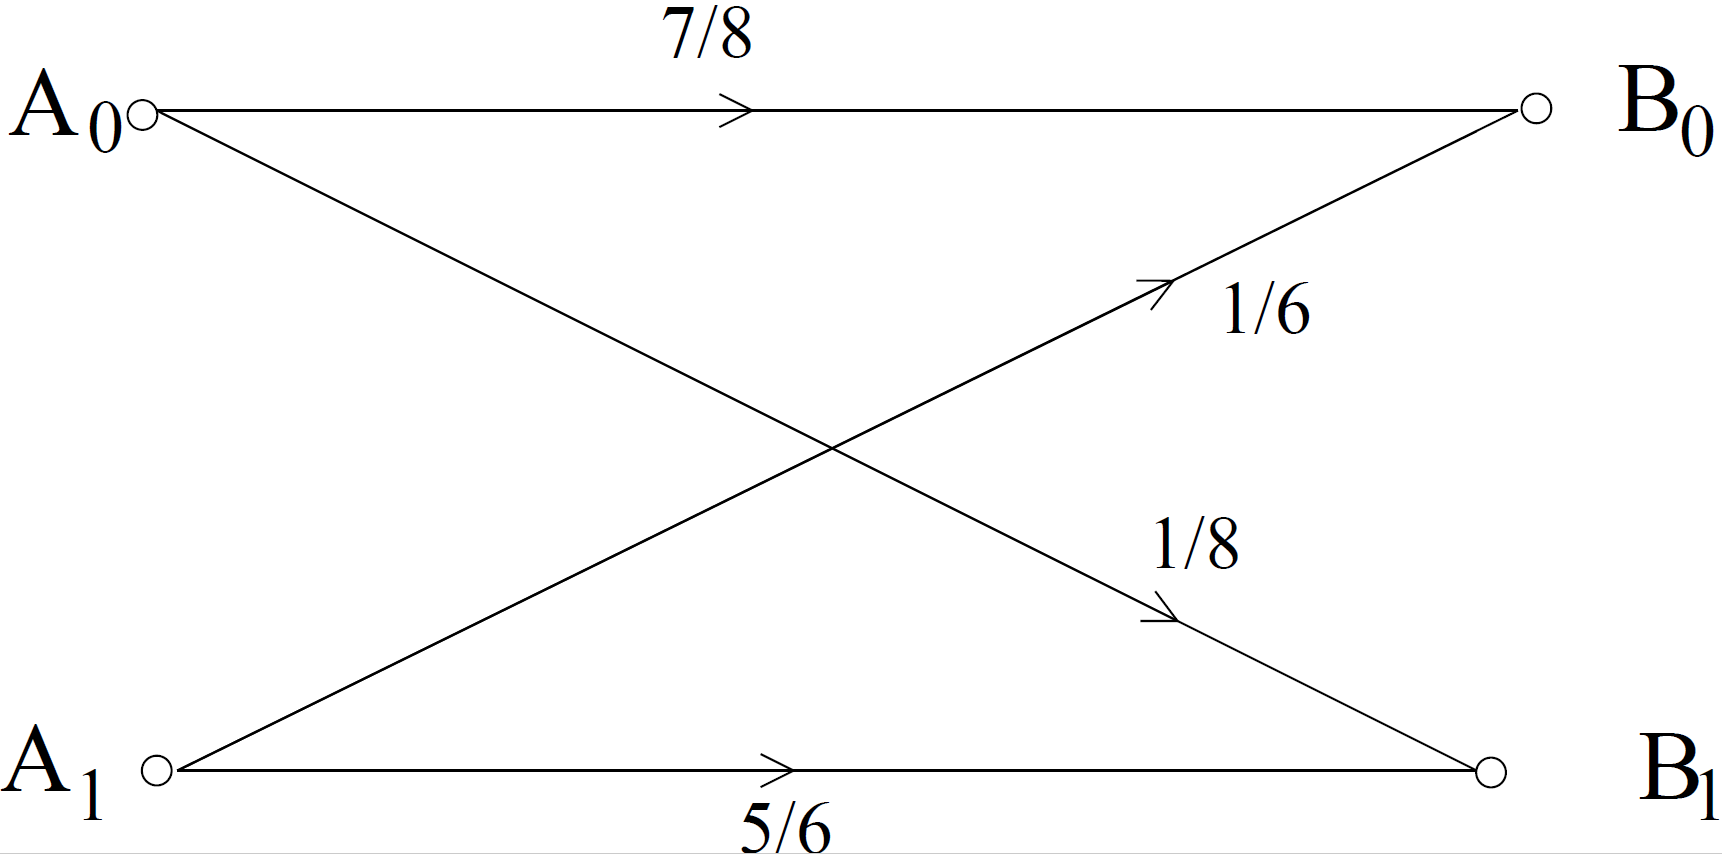

In [81]:
from IPython.display import Image
Image('figures/transition.png',width=400)

**The receiver must use a decision rule to determine from the output $B_0$ or $B_1$ whether the symbol that was sent was most likely $A_0$ or $A_1$.**

**Decision rule: Always decide $A_1$. How often will we be in error?**

1. **Determine the probability of error for these two scenarios.**
    1. $P(A_0) = \frac{2}{5}$, $P(A_1)=\frac{3}{5}$
    2. $P(A_0) = \frac{1}{10}$, $P(A_1)=\frac{9}{10}$

The goal is to choose the transmitter Tx $A_i$ that maximize some probability. What is that probability? "Probability of transmitter $A_j$ given that we received $B_i$", that is,

$$P(A_j|B_i), \forall i,j=0,1$$

So, for example, if we receive $B_0$ and observe the following 
$$P(A_0|B_0) > P(A_1|B_0)$$

then we will decide $A_0$.

* What is the problem? We were not given $P(A_j|B_i)$! These are the posterior probabilities.

* We were given:

$$P(B_0|A_0) = \frac{7}{8}, P(B_0|A_1) = \frac{1}{6}, P(B_1|A_0) = \frac{1}{8}, P(B_1|A_1) = \frac{5}{6}$$

* We can easily compute the posterior probabilities using the Bayes' rule:

\begin{align*}
P(A_j|B_i) &= \frac{P(A_j\cap B_i)}{P(B_i)} \\ 
&=\frac{P(B_i|A_j)P(A_j)}{P(B_i)} \\
&=\frac{P(B_i|A_j)P(A_j)}{\sum_j P(B_i|A_j)P(A_j)}
\end{align*}

Now we are ready to solve **problem 1**:

**<font color=orange>Scenario A:</font>** Suppose that we always decide $A_1$. For $P(A_0) = \frac{2}{5}$, $P(A_1)=\frac{3}{5}$, we have:

\begin{align*}
P(A_0|B_0) &\underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B_0)\\
\frac{P(B_0|A_0)P(A_0)}{P(B_0)} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B_0|A_1)P(A_1)}{P(B_0)} \\
\frac{\frac{7}{8}\times\frac{2}{5}}{\frac{9}{20}} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{\frac{1}{6}\times\frac{3}{5}}{\frac{9}{20}}\\
\frac{7}{9} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{2}{9} \Rightarrow \text{ Decide }A_0 
\end{align*}

So, when $B_0$ is received, MAP decision rule is to decide $A_0$.

Similarly, when $B_1$ is received, MAP decision rule is to decide $A_1$.

If the decision rule is to always decide $A_1$, then we will have some errors. We can use the Law of Total probability to compute the overall probability of error $P(E)$:

$$P(E) = P(E|B_0)P(B_0) + P(E|B_1)P(B_1)$$

where

$$P(B_0) = P(B_0|A_0)P(A_0) + P(B_0|A_1)P(A_1) = \frac{7}{8}\times\frac{2}{5} + \frac{1}{6}\times\frac{3}{5} = \frac{9}{20}$$
and
$$P(B_1) = P(B_1|A_0)P(A_0) + P(B_1|A_1)P(A_1) = \frac{1}{8}\times\frac{2}{5} + \frac{5}{6}\times\frac{3}{5} = 1- P(B_0) = \frac{11}{20}$$

For this decision rule, we have that: 

$$P(E) = \frac{7}{9}\times\frac{9}{20} + \left(1-\frac{10}{11}\right)\times\frac{11}{20} = 0.4$$

**<font color=orange>Scenario B:</font>** Suppose that we always decide $A_1$. For $P(A_0) = \frac{1}{10}$, $P(A_1)=\frac{9}{10}$, we have:

\begin{align*}
P(A_0|B_0) &\underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B_0)\\
\frac{P(B_0|A_0)P(A_0)}{P(B_0)} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B_0|A_1)P(A_1)}{P(B_0)} \\
\frac{\frac{7}{8}\times\frac{1}{10}}{\frac{19}{80}} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{\frac{1}{6}\times\frac{9}{10}}{\frac{19}{80}}\\
\frac{7}{19} &\underset{A_1}{\overset{A_0}{\gtrless}} \frac{12}{19} \Rightarrow \text{ Decide }A_1
\end{align*}

So, when $B_0$ is received, MAP decision rule is to decide $A_1$.

Similarly, when $B_1$ is received, MAP decision rule is to decide $A_1$.

When using the MAP decision rule, we will always decide $A_1$. This does not mean we will not make an error. We will make the correct decision for when receiving $B_0$ with $\frac{12}{19}$ probability. But we will be in error with $1-\frac{12}{19}$ probability for when we receive $B_0$. We apply the same reasoning for $B_1$.

$$P(E) = P(E|B_0)P(B_0) + P(E|B_1)P(B_1)$$

where

$$P(B_0) = P(B_0|A_0)P(A_0) + P(B_0|A_1)P(A_1) = \frac{7}{8}\times\frac{1}{10} + \frac{1}{6}\times\frac{9}{10} = \frac{19}{80}$$
and
$$P(B_1) = P(B_1|A_0)P(A_0) + P(B_1|A_1)P(A_1) = \frac{1}{8}\times\frac{1}{10} + \frac{5}{6}\times\frac{9}{10} = 1- P(B_0) = \frac{61}{80}$$

For this decision rule, we have that: 

$$P(E) = P(E|B_0)P(B_0) + P(E|B_1)P(B_1) = \left(1-\frac{12}{19}\right)\times\frac{19}{80} + \left(1-\frac{60}{61}\right)\times\frac{61}{80} = 0.1$$

We changed the prior probability for both transmitters. In scenario B we are assuming that the probability that the Tx $A_0$ was used at 10\% chance. Whereas in scenario A, we are assuming that the probability that Tx $A_0$ was used at 40\%. 

<h2 align="center"><font color=blue>This concludes all the material that will be covered in Exam 1</font></h2>